TODO

- with time series
1. x: time, y: mean DIC (TA/ TA-DIC)

In [ ]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'monospace',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [ ]:
regs = ['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5']

regdict = {'ARCTIC' : {'number' : 0.5},
           'P1' : {'number': 1.0},
          'P2' : {'number': 1.2},
           'P3' : {'number': 1.4},
           'P4' : {'number': 1.6},
           'P5' : {'number': 1.8},
            'A1' : {'number': 2.4},
          'A2' : {'number': 2.6},
           'A3' : {'number': 2.8},
           'A4' : {'number': 3},
           'A5' : {'number': 3.2},
           'I3' : {'number': 3.6},
           'I4' : {'number': 3.8},
           'I5' : {'number': 4},
           
          }

tics = []
tcm = 'Spectral'


tmask = nc.Dataset('/gpfs/data/greenocean/software/resources/breakdown/clq_basin_masks_ORCA.nc')

maskno = np.zeros([149,182])
for i in range(0, len(regs)):
    maskno[tmask[regs[i]][:] == 1] = regdict[regs[i]]['number']
    tics.append(regdict[regs[i]]['number'])
maskno[maskno == 0] = np.nan

w = plt.pcolor(maskno, cmap = tcm, vmin = 0.5, vmax = 4)
cbar = plt.colorbar(w, ticks=tics)
t = cbar.ax.set_yticklabels(['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5'], fontsize = 9)
plt.suptitle('ocean regions, subdivided')

fact = 0.2
fig = plt.figure(figsize=(30*fact,15*fact))
import matplotlib
cmap = matplotlib.cm.get_cmap('Spectral')
norm = matplotlib.colors.Normalize(vmin=0.5, vmax=4)
for i in range(0,len(regs)):
    rgba = cmap(norm(regdict[regs[i]]['number']))
    plt.plot(regdict[regs[i]]['number'], 1, marker = 'o', color = rgba, label = regs[i])
    regdict[regs[i]]['colour'] = rgba
plt.legend(ncol = 5, fontsize = 10)
plt.suptitle('colours assigned')


# GLODAP

In [108]:
df = pd.read_csv('/gpfs/home/mep22dku/scratch/SOZONE/evalOutput/datasets/GLODAPv2.2022_GLOBAL_valid_DICTA_umolL_STITCHED.csv')
df = df[(df.YR > 1989) & (df.YR < 2021)]
df = df[df.PRES <= 10]
df

,Unnamed: 0,YR,MONTH,DIC,ALK,SAL,TEMP,PRES,LAT,LON,Y,X,Z,Zdep,DP,REG,STATION,CRUISE
18739,18739,1990.0,5.0,2104.092014,2400.979613,35.3910,12.0020,10.000,55.61800,-19.97000,114.0,131.0,4.999938,0.0,20149.0,2.4,69.0,669.0
18759,18759,1990.0,5.0,2111.699054,2409.879257,35.4320,12.9060,10.000,52.52800,-20.00000,111.0,131.0,4.999938,0.0,19376.0,2.4,66.0,669.0
18772,18772,1990.0,5.0,2101.615389,2416.452218,35.7550,15.3070,10.000,47.05700,-19.90000,107.0,131.0,4.999938,0.0,18427.0,2.4,51.0,669.0
18776,18776,1990.0,5.0,2140.324492,2429.130210,35.9650,15.3510,10.000,38.99800,-20.00300,102.0,131.0,4.999938,0.0,15513.0,2.6,41.0,669.0
18798,18798,1990.0,5.0,2115.226922,2423.152049,35.9030,14.7890,10.000,41.00300,-19.99800,103.0,131.0,4.999938,0.0,16507.0,2.6,43.0,669.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388940,388940,2020.0,7.0,2075.801888,2313.458578,33.6795,8.6635,3.246,55.25276,-53.99350,114.0,115.0,4.999938,0.0,20008.0,2.4,66.0,4005.0
388943,388943,2020.0,7.0,2065.402333,2255.366830,32.2141,2.7871,9.934,54.95612,-54.28842,114.0,115.0,4.999938,0.0,19917.0,2.4,57.0,4005.0
388951,388951,2020.0,7.0,2030.767627,2250.484647,32.3338,7.3996,2.772,55.09360,-54.11322,114.0,115.0,4.999938,0.0,19976.0,2.4,61.0,4005.0
388952,388952,2020.0,7.0,2042.009887,2261.445162,32.5804,4.2822,9.503,55.09420,-54.11396,114.0,115.0,4.999938,0.0,19977.0,2.4,61.0,4005.0


In [110]:
tDIC = np.array(df['DIC'][:])
tALK = np.array(df['ALK'][:])
tSAL = np.array(df['SAL'][:])

tYEAR = np.array(df['YR'])
tY = np.array(df['Y'])
tX = np.array(df['X'])

tREG_new = np.array(tX)

for j in range(len(tY)):
    y = tY[j].astype(int)
    x = tX[j].astype(int)
    tREG_new[j] = maskno[y, x]
    
# print(tREG_new)
# len(tREG_new)


In [111]:
td = {}
td = {'YR':tYEAR ,'DIC':  tDIC, 'TA':tALK, 'SAL': tSAL ,'REG': tREG_new, 'YR_Group':tYEAR ,'REG_Group': tREG_new,}
tdat = pd.DataFrame(data=td)

tdat_fil = tdat[(tdat.DIC>-999) & (tdat.TA>-999) & (tdat.DIC != 0) & (tdat.TA != 0)]

tdat_fil_mean = tdat_fil.groupby(by=["YR_Group","REG_Group"]).mean()

tdat_fil_mean


YR          DIC           TA        SAL  REG
YR_Group REG_Group                                                  
1990.0   2.4        1990.0  2112.454621  2412.413206  35.655524  2.4
         2.6        1990.0  2130.638998  2438.054304  36.202200  2.6
1991.0   0.5        1991.0  2142.641723  2274.724541  32.680692  0.5
         1.2        1991.0  2033.769651  2341.949993  34.556000  1.2
         1.4        1991.0  2007.605115  2339.710074  34.857323  1.4
...                    ...          ...          ...        ...  ...
2020.0   1.2        2020.0  2014.470329  2326.685937  34.616689  1.2
         1.4        2020.0  1964.560339  2291.364832  34.125400  1.4
         2.4        2020.0  2081.813247  2276.925493  33.031298  2.4
         3.8        2020.0  2125.434689  2383.630589  35.238429  3.8
         4.0        2020.0  2220.189600  2349.540209  33.781486  4.0

[281 rows x 5 columns]

# MODELS

In [ ]:
mean_masks = np.zeros([len(regs), 149, 182])
for i, reg in enumerate(regs):
    mean_masks[i][maskno == regdict[reg]['number']] = 1

In [ ]:
import glob

def make_yearlist(yrst, yrend, dtype, tr, baseDir):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/{tr}/ORCA2_1m_{yrs[i]}*{dtype}*.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist


In [67]:
baseDir = '/gpfs/data/greenocean/software/runs/'
yrst = 1990
yrend = 2020 
depth = 0
modlist = ['TOM12_TJ_GEA0'] #, 'TOM12_TJ_GEA1','TOM12_TJ_1ASA', 'TOM12_DW_WE43','TOM12_DW_GA01']

dtype = 'ptrc' 

data_DICTA = {}

for modnam in modlist:
    tylist = make_yearlist(yrst, yrend, dtype, modnam, baseDir)
    tdat = xr.open_mfdataset(tylist)

    DIC0 = tdat.DIC.isel(deptht=depth)
    TA0 = tdat.Alkalini.isel(deptht=depth)
    
    DIC_t = DIC0.groupby('time_counter.year').mean(dim = ['time_counter'])
    TA_t = TA0.groupby('time_counter.year').mean(dim = ['time_counter'])
    
    DIC_mean = np.zeros([len(regs), len(DIC_t), ])
    TA_mean = np.zeros([len(regs), len(TA_t), ])
    
    for j in range(len(regs)):
        mask_data_array = xr.DataArray(mean_masks[j], dims=['y', 'x'])
        for time_i in range(len(DIC_t)):
            DIC_mean[j][time_i] = DIC_t[time_i].weighted(mask_data_array).mean(dim = ['x','y'])
            TA_mean[j][time_i] = TA_t[time_i].weighted(mask_data_array).mean(dim=['x', 'y'])

    data_DICTA[modnam] = {'TA_year_mean':  TA_mean, 'DIC_year_mean':DIC_mean}


In [68]:
data_DICTA = pd.DataFrame(data=data_DICTA)
data_DICTA

,TOM12_TJ_GEA0
DIC_year_mean,"[[0.0018678623210295476, 0.0018714841879560985..."
TA_year_mean,"[[0.0019830948148723757, 0.0019851568391794534..."


In [75]:
years_list = list(range(yrst,yrend+1))
# years_list

In [80]:
len(data_DICTA['TOM12_TJ_GEA0']['DIC_year_mean'][j])
len(years_list)

31

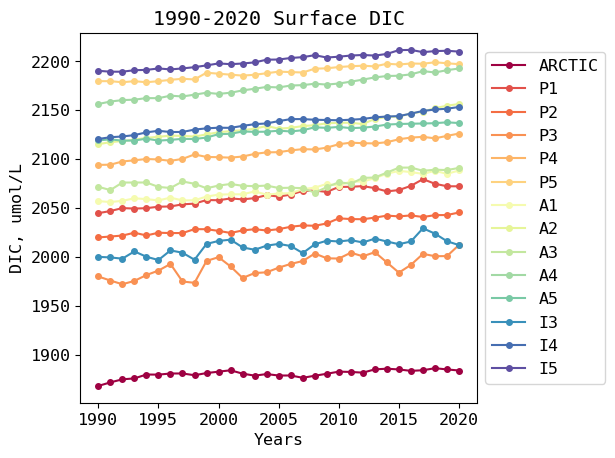

In [95]:
s = 4

fig = plt.figure()
ax = plt.subplot(111)

for j, reg in enumerate(regs):
    plt.plot(years_list, data_DICTA['TOM12_TJ_GEA0']['DIC_year_mean'][j]*1e6, marker = 'o', markersize = s,
             label = f'{reg}', color=cmap(norm(regdict[reg]['number'])))

plt.title(f'{yrst}-{yrend} Surface DIC')
plt.xlabel('Years')
plt.ylabel('DIC, umol/L')

# Legend
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

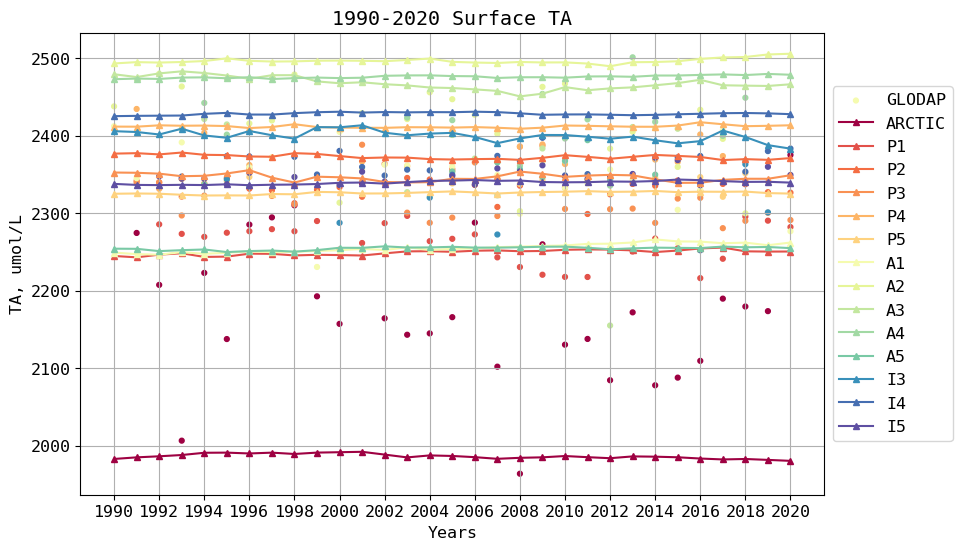

In [122]:
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(111)

#GLODAP
plt.scatter(tdat_fil_mean['YR'], tdat_fil_mean['TA'] ,
            marker = 'o',s=s*3, label = 'GLODAP',color=cmap(norm(tdat_fil_mean['REG'])))


for j, reg in enumerate(regs):
    plt.plot(years_list, data_DICTA['TOM12_TJ_GEA0']['TA_year_mean'][j]*1e6, marker = '^', markersize = s,
             label = f'{reg}', color=cmap(norm(regdict[reg]['number'])))

plt.title(f'{yrst}-{yrend} Surface TA')
plt.xlabel('Years')
plt.ylabel('TA, umol/L')
plt.xticks(np.arange(yrst,yrend+1,2))
plt.grid()

# Legend
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()